In [1]:
from utility_dfcutter import *
from utility_dfplotter import *
import utility_common as common
%matplotlib inline

In [85]:
selection,nbjet,njet = 'emu2','==1','>=2'
plotter = DFPlotter(selection,nbjet,njet)
dfList = plotter.getDataFrameList(variation="")

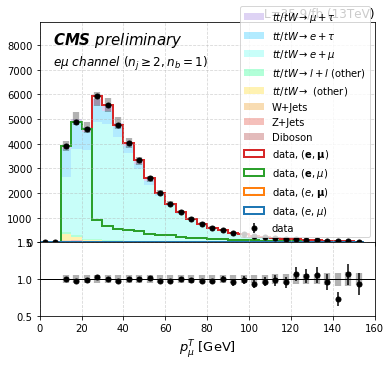

In [87]:
v,a,b,step,xl = 'lepton1_pt',0,160,5, r'$p_{\mu}^T$ [GeV]'
mybin  = np.arange(a,b,step)
center = mybin[1:]-step/2

sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl, plotter.labelList, plotter.colorList,logscale=False, withXsErr=True)
sk.makePlot()

ax = sk.axes[0]
list_varable = [ dfList[-1].query('trTest=={}'.format(i))[v] for i in [0,1,2,3] ]
list_weight = [ dfList[-1].query('trTest=={}'.format(i))['eventWeight'] for i in [0,1,2,3] ]
ax.hist(list_varable,mybin,weights=list_weight,histtype='step',stacked=True, linewidth=2, 
        label= [r'data, ($e,\mu$)',
                r'data, ($e,\mathbf{\mu}$)',
                r'data, ($\mathbf{e},\mu$)',
                r'data, ($\mathbf{e},\mathbf{\mu}$)'])
ax.legend()
ax.text(0.04*b+0.96*a, sk.hdata.max()*1.2, r'$e\mu$ channel $(n_j\geq 2,n_b=1 )$',style='italic',fontsize='12')

baseDir = common.getBaseDirectory()
plt.savefig(baseDir+'plots/trgLep_'+selection+'.png',dpi=300)


(array([  0.,   0.,   0.,   0., 335., 252., 191., 171., 147., 115.,  67.,
         56.,  39.,  32.,  35.,  21.,  23.,  16.,  13.,  10.,   5.,   5.,
          4.,   7.,   1.,   3.,   1.]),
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
        140, 145]),
 <a list of 27 Patch objects>)

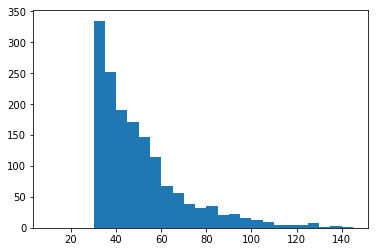

In [7]:

mctt = DFCutter(selection,nbjet=nbjet,name='mctt',njet=njet).getDataFrame(variation="")
mct  = DFCutter(selection,nbjet=nbjet,name='mct',njet=njet).getDataFrame(variation="")
mcw  = DFCutter(selection,nbjet=nbjet,name='mcw',njet=njet).getDataFrame(variation="")
mcz  = DFCutter(selection,nbjet=nbjet,name='mcz',njet=njet).getDataFrame(variation="")
mcvv = DFCutter(selection,nbjet=nbjet,name='mcdiboson',njet=njet).getDataFrame(variation="")
data = DFCutter(selection,nbjet=nbjet,name="data2016", njet=njet).getDataFrame(variation="")
    
mc = pd.concat([mcvv,mcz,mcw,mct,mctt],ignore_index=True)

In [ ]:
def processBreakdown():
    dfList = [mcvv,mcz,mcw,mct,mctt,data]

    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   ['VV',"Z","W","tW","tt","data"], 
                   ["#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_process_tight.png'.format(selection,v),dpi=300)



In [2]:
class PlotterManager:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        dfList = []
        for name in ['B','C','D','E','F','G','H']:
            dfList.append(DFCutter(self.selection,self.nbjet,'data2016'+name, self.njet).getDataFrame())
        return dfList
        
    def _setConfiguration(self):
        self.luminList  = [5.750,2.573,4.242,4.025,3.105,7.576,8.651]
        self.mcsgQueryList = []
        self.labelList = ['16B: 5.8/fb',
                          '16C: 2.6/fb',
                          '16D: 4.2/fb',
                          '16E: 4.0/fb',
                          '16F: 3.1/fb',
                          '16G: 7.6/fb',
                          '16H: 8.7/fb']
        self.colorList = ['#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']
        
        
def makeAPlot(df_list, label_list, color_list, v,a,b,step,xl):
    
    
    mybin         = np.arange(a,b,step)
    variable_list = [mc[v].values for mc in df_list]
    weight_list   = [mc['eventWeight'].values for mc in df_list]

    plt.rc('figure',facecolor='w')
    fig, axes = plt.subplots(2, 1, sharex=True, 
                             gridspec_kw={'height_ratios':[3,1]},
                             figsize=(6,6))
    fig.subplots_adjust(hspace=0)
    
    # upper plot
    ax = axes[0]
    mc =  ax.hist(variable_list, 
                  label   = label_list,
                  color   = color_list,
                  bins = mybin, lw=0, alpha=1, 
                  histtype='stepfilled',
                  stacked=True
                 )
    mc = mc[0][-1]
    
    ax.text(0.04*b+0.96*a, 1.35*mc.max(), r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
    ax.text(0.04*b+0.96*a, 1.2*mc.max(), r'$e +jets$ channel $(n_j\geq 4,n_b= 2 )$',style='italic',fontsize='12')
    
    ax.grid(True,linestyle='--',alpha=0.5)
    ax.set_ylim(0,1.5*mc.max())
    ax.legend()
    ax.set_title('L=35.9/fb (13TeV)',loc='right')
    
    # lower plot
    ax = axes[1]
    lumin_list  = [5.750,2.573,4.242,4.025,3.105,7.576,8.651]
    weight_list = [mc['eventWeight'].values/lumin_list[i] for i,mc in enumerate(df_list)]

    mc =  ax.hist(variable_list, 
                  weights  = weight_list,
                  label   = label_list,
                  color   = color_list,
                  bins = mybin, lw=1, alpha=1, 
                  histtype='step'
                 )
    mc = mc[0][-1]
    ax.set_ylabel('event per /fb',fontsize='10')
    
    ax.set_xlim(a, b)
    ax.set_ylim(0,1.2*mc.max())
    ax.grid(True,linestyle='--',alpha=0.5)
    
    ax.set_xlabel(xl,fontsize='12')
        

In [3]:
selection,nbjet = 'e4j','==1'
pmng = PlotterManager(selection,nbjet)
df_list = pmng.getDataFrameList()
label_list = pmng.labelList
color_list = pmng.colorList

baseDir = common.getBaseDirectory()
pp = pd.read_csv(baseDir+'python/plotterItemTables/itemTable_{}.csv'.format(selection))
#pp = pd.read_csv(baseDir+'python/plotterItemTables/itemTable_{}.csv'.format('emu'))
# v,a,b,step,xl = 'lepton2_eta',-3,3,0.1,'lepton1_eta'
# makeAPlot(df_list,label_list,color_list,v,a,b,step,xl)

In [4]:
def plotRatio(i,j):
    plt.figure(figsize=(10,6))
    df1,df2 = df_list[i],df_list[j]
    lumi1,lumi2 = pmng.luminList[i],pmng.luminList[j]

    etabin = np.linspace(-2.5,2.5,10)
    phibin = np.linspace(-np.pi,np.pi,10)
    h1,_,__ = np.histogram2d(df1.lepton1_eta,df1.lepton1_phi,bins=(etabin,phibin))
    h2,_,__ = np.histogram2d(df2.lepton1_eta,df2.lepton1_phi,bins=(etabin,phibin))
    h1 /= lumi1
    h2 /= lumi2

    ratio = h1.T/h2.T
    plt.imshow(ratio,aspect=0.4, vmin=0.5,vmax=1.5,cmap="PiYG_r",extent=[etabin.min(),etabin.max(), phibin.min(), phibin.max()])
    etabinsize = etabin[1]-etabin[0]
    phibinsize = phibin[1]-phibin[0]
    for i in range(ratio.shape[0]):
        for j in range(ratio.shape[1]):
            r = ratio[i,j]
            plt.text(etabin[j]+etabinsize/5,-phibin[i]-phibinsize*0.6,"{:3.2f}".format(r))
    plt.colorbar(shrink=0.5)
    plt.xlabel(r"$\eta$")
    plt.ylabel(r"$\phi$")
    plt.axvline(1.4,c='k',linestyle='--',lw=1)
    plt.axvline(-1.4,c='k',linestyle='--',lw=1)
    

In [5]:
for i in range(7):
    for j in range(7):
        plotRatio(i,j)
        eras = ["B","C","D","E","F","G","H"]
        plt.title("2016{}/2016{}".format(eras[i],eras[j]))
        plt.savefig("../../plots/e4j_ratio/{}_over_{}.png".format(eras[i],eras[j]),dpi=200)
        plt.close()

In [4]:
for index, row in pp.iterrows():

    v,a,b,step,xl = row['var'],row['lower'],row['upper'],row['step'],row['xlabel']

    makeAPlot(df_list,label_list,color_list,v,a,b,step,xl)
    plt.savefig(baseDir+'plots/data_kinematics/{}/1b/2017_{}_1b_{}.pdf'.format(selection,selection,v))
    plt.close()

In [182]:
mean,std = [],[]

lumin_list  = [5.750,2.573,4.242,4.025,3.105,7.576,8.651]
for (df,lumin) in zip(df_list,lumin_list):
    n = df.size
    nVar = df.size
    rate = n/lumin
    rateVar = rate**2 * (nVar/n**2 + 0.025**2)
    mean.append(rate)
    std.append(rateVar**0.5)
    print("{:6.1f}+/-{:6.1f}".format(rate,rateVar**0.5))

df = DFCutter(selection,nbjet,'data2016').getDataFrame()
aveAll = df.size/35.9

609373.9+/-15237.8
590145.0+/-14761.4
592697.8+/-14822.2
562859.6+/-14076.5
573220.0+/-14336.9
607540.4+/-15191.1
611964.9+/-15301.4


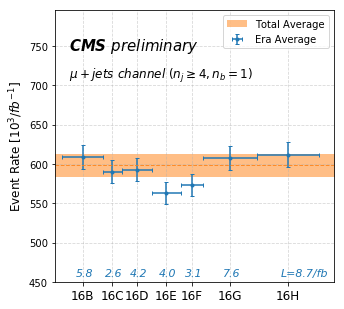

In [183]:
lumin_list = np.array(lumin_list)
xstd = lumin_list/2
xpos = np.cumsum(lumin_list) - xstd

ypos = np.array([i/1000 for i in mean])
ystd = np.array([i/1000 for i in std ])
plt.figure(facecolor='w',figsize=(5,5))


ave = aveAll/1000
aveStd = ave*0.025


plt.fill_between(np.arange(-2,40),ave+aveStd,ave-aveStd, alpha=0.5, color='C1',lw=0,label='Total Average')
plt.axhline(ave, color='C1',lw=1, alpha=0.8, linestyle="--")

plt.errorbar(xpos,ypos,yerr=ystd,xerr=xstd, color='C0',fmt='.', capsize=2,label='Era Average')
plt.ylabel(r'Event Rate [$10^3/fb^{-1}$]',fontsize=12)
plt.xticks(xpos,['16B','16C','16D','16E','16F','16G','16H'],fontsize=12)
plt.xlim(-1,38)

ylower, yupper = 0.8*ypos.min(),1.3*ypos.max()
yrange = yupper-ylower
plt.ylim(ylower,yupper)

plt.grid(linestyle='--',alpha=0.5)

for i in range(len(xpos)):
    string = r'{:3.1f}'.format(lumin_list[i])
    if i == len(xpos)-1:
        string = 'L='+string
        string += r'/fb'
    plt.text(xpos[i]-1, ylower+yrange*0.02, string, color='C0', style='italic', fontsize='11')


plt.text(1, yupper-yrange*0.15, r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(1, yupper-yrange*0.25, r'$\mu +jets$ channel $(n_j\geq 4,n_b=1 )$',style='italic',fontsize='12')

plt.legend()
plt.savefig(baseDir+'plots/data_{}.png'.format(selection),dpi=300)


428406.40668523678

In [45]:
ypos.min()

339.94558880684025